In [117]:
import numpy as np
import stim
import pymatching

circuit = stim.Circuit.generated("repetition_code:memory",
                                 distance=3,
                                 rounds=3,
                                 after_clifford_depolarization=0.1)

True

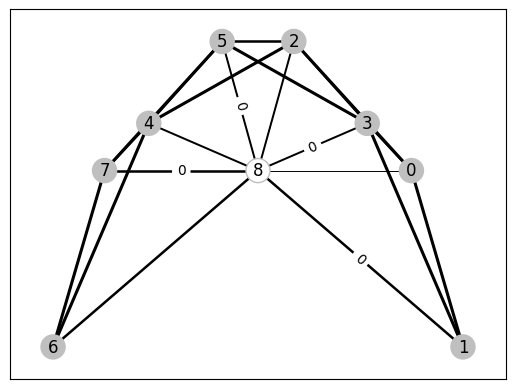

In [153]:
model = circuit.detector_error_model(decompose_errors=True)
matching = pymatching.Matching.from_detector_error_model(model)
matching.add_edge(0, 1, weight=1, merge_strategy="independent")
matching.draw()
matching.has_edge(0,1)

In [154]:
matching.edges()[1][2]["weight"] = 0
matching.add_edge(0, 1, weight=1, merge_strategy="replace")
matching.edges()

[(0,
  None,
  {'fault_ids': set(),
   'weight': 0.8780228050623442,
   'error_probability': -1.0}),
 (0, 1, {'fault_ids': set(), 'weight': 1.0, 'error_probability': -1.0}),
 (0,
  2,
  {'fault_ids': set(),
   'weight': 3.568738257010482,
   'error_probability': 0.02741843737473918}),
 (0,
  3,
  {'fault_ids': set(),
   'weight': 2.876385515921424,
   'error_probability': 0.05333333333333336}),
 (1,
  3,
  {'fault_ids': set(),
   'weight': 3.568738257010482,
   'error_probability': 0.02741843737473918}),
 (1,
  None,
  {'fault_ids': {0},
   'weight': 2.8763855159214238,
   'error_probability': 0.05333333333333338}),
 (2,
  None,
  {'fault_ids': set(),
   'weight': 2.1864072823588314,
   'error_probability': 0.10097777777777785}),
 (2,
  3,
  {'fault_ids': set(),
   'weight': 2.876385515921424,
   'error_probability': 0.05333333333333336}),
 (2,
  4,
  {'fault_ids': set(),
   'weight': 3.568738257010482,
   'error_probability': 0.02741843737473918}),
 (2,
  5,
  {'fault_ids': set(),
   

# Draw mathching graph

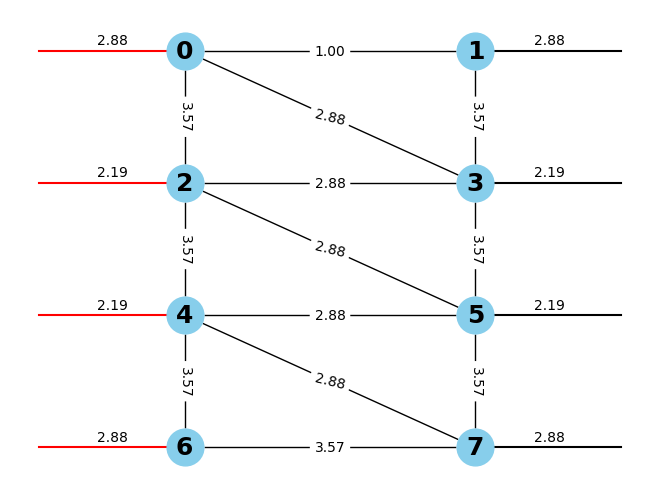

In [135]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_matching_graph(matching, d, T):
    G = nx.Graph()
    pos = {}
    edge_colors = []
    
    for edge in matching.edges():
        src_node, tgt_node, edge_data = edge
        if tgt_node is not None:
            G.add_edge(src_node, tgt_node, weight=edge_data['weight'])
            if edge_data.get('fault_ids'):
                edge_colors.append('r')
            else:
                edge_colors.append('k')
        
        x_src = src_node % (d-1)
        y_src = src_node // (d-1)
        pos[src_node] = (x_src, -y_src)
    
    nx.draw(G, pos, with_labels=True, node_color='white', edge_color=edge_colors, font_weight='bold', node_size=700, font_size=18)
    
    edge_weights = nx.get_edge_attributes(G, 'weight')
    labels = {k: f"{v:.2f}" for k, v in edge_weights.items()}
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    for edge in matching.edges():
        src_node, tgt_node, edge_data = edge
        if tgt_node is None:
            x_src = src_node % (d-1)
            y_src = src_node // (d-1)
            color = 'r' if edge_data.get('fault_ids') == set() else 'k'
            weight_text = f"{edge_data.get('weight'):.2f}"
            if x_src == 0:
                plt.plot([x_src, x_src - 0.5], [-y_src, -y_src], color=color)
                plt.text(x_src - 0.3, -y_src + 0.05, weight_text)
            elif x_src == d - 2:
                plt.plot([x_src, x_src + 0.5], [-y_src, -y_src], color=color)
                plt.text(x_src + 0.2, -y_src + 0.05, weight_text)

    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
    
    plt.show()

draw_matching_graph(matching, 3, 3)



In [124]:
model.diagram("matchgraph-3d")

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":46,"max":[9,17.3205032348633,0],"min":[-5.9442720413208,-8.32050228118896,0],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":20,"max":[17.9442710876465,17.3205032348633,0],"min":[9,-8.32050228118896,0],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":552,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":2,"byteLength":240,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byteLength":552,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AABAQAAAAAAAAAAAFAIjwMcgBcEAAAAAAABAQAAAAAAAAAAAAAAQQQAAAAAAAAAAAABAQAAAAAAAAAAAAABAQAAAQEAAAAAAAABAQAAAAAAAAAAAAAAQQQAAQEAAAAAAAAAQQQAAAAAAAAAAAAAQQQAAQEAAAAAAAABAQAAAQEAAAAAAeje+wPRuvL8AAAAAAABAQAAAQEAAAAAAAAAQQQAAQEAAAAAAAABAQAAAQEAAAAAAAABAQAAAwEAAAAAAAABAQAAAQEAAAAAAAAAQQQAAwEAAAAAAAABAQAAAQEAAAAAAeje+wPRuvL8AAAAAAABAQAAAAAAAAAAAFAIjwMcgBcEAAAAAAAAQQQAAQEAAAAAAAAAQQQAAwEAAAAAAAABAQAAAwEAAAAAAeje+wN6NJ0EAAAAAAABAQAAAwEAAAAAAAAAQQQAAwEAAAAAAAABAQAAAwEAAAAAAAABAQAAAEEEAAAAAAABAQAAAwEAAAAAAAAAQQQAAEEEAAAAAAABAQAAAwEAAAAAAeje+wN6NJ0EAAAAAAABAQAAAQEAAAAAAeje+wPRuvL8AAAAAAAAQQQAAwEAAAAAAAAAQQQAAEEEAAAAAAABAQAAAEEEAAAAAFAIjwGSQikEAAAAAAABAQAAAEEEAAAAAAAAQQQAAEEEAAAAAAABAQAAAEEEAAAAAFAIjwGSQikEAAAAAAABAQAAAwEAAAAAAeje+wN6NJ0EAAAAA"},{"byteLength":240,"name":"buf_red_scattered_lines","uri":"data:application/octet-stream;base64,AAAQQQAAAAAAAAAAhcBoQccgBcEAAAAAAAAQQQAAQEAAAAAA3o2PQfRuvL8AAAAAAAAQQQAAQEAAAAAA3o2PQfRuvL8AAAAAAAAQQQAAAAAAAAAAhcBoQccgBcEAAAAAAAAQQQAAwEAAAAAA3o2PQd6NJ0EAAAAAAAAQQQAAwEAAAAAA3o2PQd6NJ0EAAAAAAAAQQQAAQEAAAAAA3o2PQfRuvL8AAAAAAAAQQQAAEEEAAAAAhcBoQWSQikEAAAAAAAAQQQAAEEEAAAAAhcBoQWSQikEAAAAAAAAQQQAAwEAAAAAA3o2PQd6NJ0EAAAAA"}],"materials":[{"doubleSided":true,"name":"black","pbrMetallicRoughness":{"baseColorFactor":[0,0,0,1],"metallicFactor":1,"roughnessFactor":1}},{"doubleSided":true,"name":"black","pbrMetallicRoughness":{"baseColorFactor":[0,0,0,1],"metallicFactor":1,"roughnessFactor":1}},{"doubleSided":true,"name":"red","pbrMetallicRoughness":{"baseColorFactor":[1,0,0,1],"metallicFactor":1,"roughnessFactor":1}}],"meshes":[{"primitives":[{"attributes":{"POSITION":0},"material":0,"mode":6}]},{"primitives":[{"attributes":{"POSITION":1},"material":1,"mode":1}]},{"primitives":[{"attributes":{"POSITION":2},"material":2,"mode":1}]}],"nodes":[{"mesh":0,"translation":[3,0,0]},{"mesh":0,"translation":[9,0,0]},{"mesh":0,"translation":[3,3,0]},{"mesh":0,"translation":[9,3,0]},{"mesh":0,"translation":[3,6,0]},{"mesh":0,"translation":[9,6,0]},{"mesh":0,"translation":[3,9,0]},{"mesh":0,"translation":[9,9,0]},{"mesh":1,"translation":[0,0,0]},{"mesh":2,"translation":[0,0,0]}],"scene":0,"scenes":[{"nodes":[0,1,2,3,4,5,6,7,8,9]}]}

# Syndromes

In [156]:
sampler = circuit.compile_detector_sampler()
syndrome, actual_observables = sampler.sample(shots=1, separate_observables=True)
print("syndrome: ", syndrome)
print("actual_observables: ", actual_observables)

syndrome:  [[False False  True False False  True False False]]
actual_observables:  [[False]]


In [192]:
num_errors = 0
syndrome = np.array([[0, 0, 0, 0, 0, 1, 1, 1]])
for i in range(syndrome.shape[0]):
    predicted_observables = matching.decode(syndrome[i, :])
    print("predicted_observables: ", predicted_observables)
    matched_edges = matching.decode_to_edges_array(syndrome[i, :])
    print("matched_edges: ", matched_edges)
    num_errors += not np.array_equal(actual_observables[i, :], predicted_observables)
    print("num_errors: ", num_errors)

print(num_errors)  # prints 8

predicted_observables:  [1]
matched_edges:  [[ 5 -1]
 [ 6  7]]
num_errors:  1
1
